# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

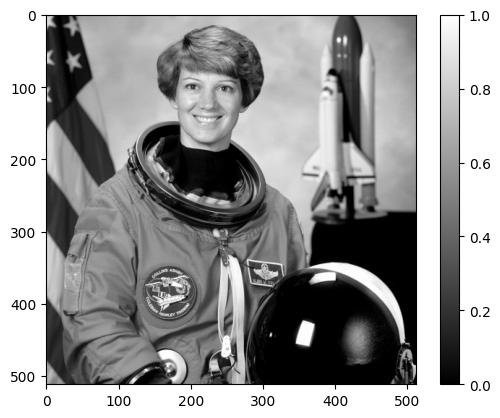

In [12]:
img = plt.imread("data/astronaut.png")

plt.imshow(img, "gray") 

plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [7]:
imgmean = img.copy()

def meanfilter(img, size):
    # Ergebnis, dass mit Nullen gefüllt wird
    result = np.zeros(img.shape)
    
    # Hälfte der Filtergröße für den Rand
    n = (size - 1) // 2

    # Über alle Pixel im Bild iterieren
    for p in np.ndindex(img.shape):
        row, col = p 

        # Überprüfe, ob Pixel im Bildbereich mit Bedingungen liegt
        if row >= n and row < img.shape[0] - n and col >= n and col < img.shape[1] - n:
            neighborhood_sum = 0

            # Um Filterfeld um Pixel iterieren
            for i in range (-n, n + 1):
                for j in range (-n, n + 1):

                    # Überprüfe ob Index im gültigen Bereich liegt
                    if 0 <= row + i < img.shape[0] and 0 <= col + j < img.shape[1]:

                        # Berechne Neighborhoodsum
                        neighborhood_sum = neighborhood_sum + img[row + i, col + j]

                # Berechne Mittelwert und speicher ihn im Bild
                result[row, col] = neighborhood_sum / (size ** 2)
    
    return result 

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

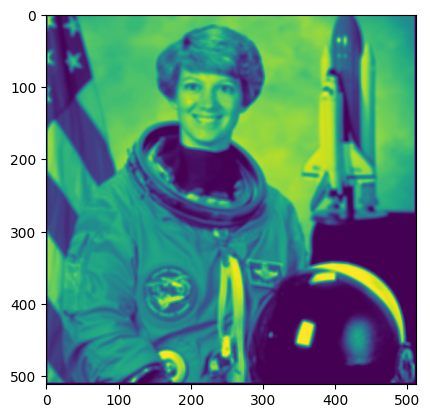

In [16]:
imgmean = meanfilter(img, 5) 

plt.imshow(imgmean)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

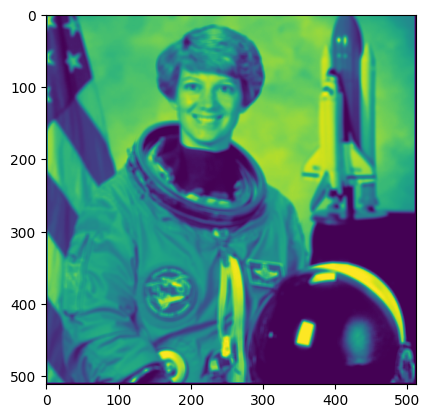

In [17]:
img_sample5 = plt.imread("data/astronaut_meanfilter5.png")

assert np.allclose(imgmean, img_sample5, atol = 1 / 255)

plt.imshow(img_sample5)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [23]:
imgmedian = img.copy()

def meanfilter(img, size):
    # Ergebnis, dass mit Nullen gefüllt wird
    result = np.zeros(img.shape)
    
    # Hälfte der Filtergröße für den Rand
    n = (size - 1) // 2

    # Über alle Pixel im Bild iterieren
    for p in np.ndindex(img.shape):
        row, col = p 

        # Überprüfe, ob Pixel im Bildbereich mit Bedingungen liegt
        if row >= n and row < img.shape[0] - n and col >= n and col < img.shape[1] - n:
            neighborhood_sum = 0

            intensities = list()

            # Um Filterfeld um Pixel iterieren
            for i in range (-n, n + 1):
                for j in range (-n, n + 1):

                    # Pixelwerte werden in einer Liste gespeichert
                    i = imgmedian[row >= n and row < img.shape[0] - n and col >= n and col < img.shape[1] - n]
                    intensities.append(i)
                intensities.sort()
                
                # Sortiert die Werte der Liste
                p = filtersorted[len(intensities//2)]
                result[row, col] = p
                        
    return result 

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

In [24]:
imgmedian = medianfilter(img, 5) 

plt.imshow(imgmedian)

NameError: name 'numpy' is not defined

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [26]:
imgmedian_sample5 = plt.imread("data/astronaut_medianfilter5.png")

plt.show(imgmedian_sample5)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [27]:
import scipy.ndimage 

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [33]:
scipy.ndimage.uniform_filter(img, size)

plt.imshow(img, 3)

NameError: name 'size' is not defined

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: